# Project : Death Predictions for UCI re-admissions

## Imports

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib as mpl

In [141]:
# Define own color palette
custom_palette = ["#355070", "#515575", "#6d597a", "#915f78", "#b56576", "#e56b6f", "#e88c7d", "#eaac8b"]
sns.set_palette(custom_palette)
mpl.rcParams['font.family'] = 'verdana'

In [127]:
drive.mount('/content/drive', force_remount=True)
file_path = "/content/drive/MyDrive/Colab Notebooks/data01.csv"
df = pd.read_csv(file_path, sep = ',')
df.describe()

Mounted at /content/drive


,Hstatus,Group,Gender,Race,Norepinephrine,Dopamine,Epinephrine,Phenylephrine,Vasopressin,Vent,...,Hb,MCH,MCHC,MCV,Platelet,Potassium,Sodium,RBC,RDW,WBC
count,15983.000000,15983.0,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,...,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000
mean,0.124382,1.0,1.453607,1.483639,0.243258,0.029969,0.046174,0.075205,0.072953,0.857661,...,10.233511,29.541444,32.302196,91.511462,209.162986,4.325633,138.110993,3.485346,15.813001,11.916962
std,0.330027,0.0,0.497859,0.774931,0.429063,0.170508,0.209868,0.263730,0.260067,0.349408,...,2.162991,2.789837,1.731642,7.426355,101.759615,0.784624,5.339360,0.756970,2.371528,8.671525
min,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.300000,16.200000,24.700000,60.000000,5.000000,1.600000,92.000000,0.780000,10.800000,0.100000
25%,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,8.600000,28.000000,31.200000,87.000000,143.000000,3.800000,135.000000,2.930000,14.100000,7.400000
50%,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,10.100000,29.800000,32.400000,91.000000,193.000000,4.200000,139.000000,3.430000,15.300000,10.300000
75%,0.000000,1.0,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,11.600000,31.300000,33.500000,96.000000,255.000000,4.700000,141.000000,3.970000,17.000000,14.300000
max,1.000000,1.0,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,20.700000,42.000000,38.700000,129.000000,1229.000000,9.800000,185.000000,7.150000,36.000000,248.600000


In [3]:
# df.drop(columns = 'ID', inplace = True)
df.dtypes

Hstatus              int64
Group                int64
Gender               int64
Race                 int64
Norepinephrine       int64
Dopamine             int64
Epinephrine          int64
Phenylephrine        int64
Vasopressin          int64
Vent                 int64
Intubated            int64
COPD                 int64
AMI                  int64
MC                   int64
Diabetes             int64
HepF                 int64
Age                  int64
SOFA                 int64
APSIII               int64
Temperature        float64
RespiratoryRate      int64
HeartRate            int64
SBP                  int64
AG                   int64
BUN                  int64
Calcium            float64
Chloride             int64
Creatinine         float64
Hb                 float64
MCH                float64
MCHC               float64
MCV                float64
Platelet             int64
Potassium          float64
Sodium               int64
RBC                float64
RDW                float64
W

## EDA

In [149]:
corr_mat = df.corr()
corr_mat_cols = corr_mat.loc[(corr_mat['Hstatus'] < -0.20) | (corr_mat['Hstatus'] > 0.20), 'Hstatus'].index

In [150]:
filtered_df = df[corr_mat_cols]

<function matplotlib.pyplot.show(close=None, block=None)>

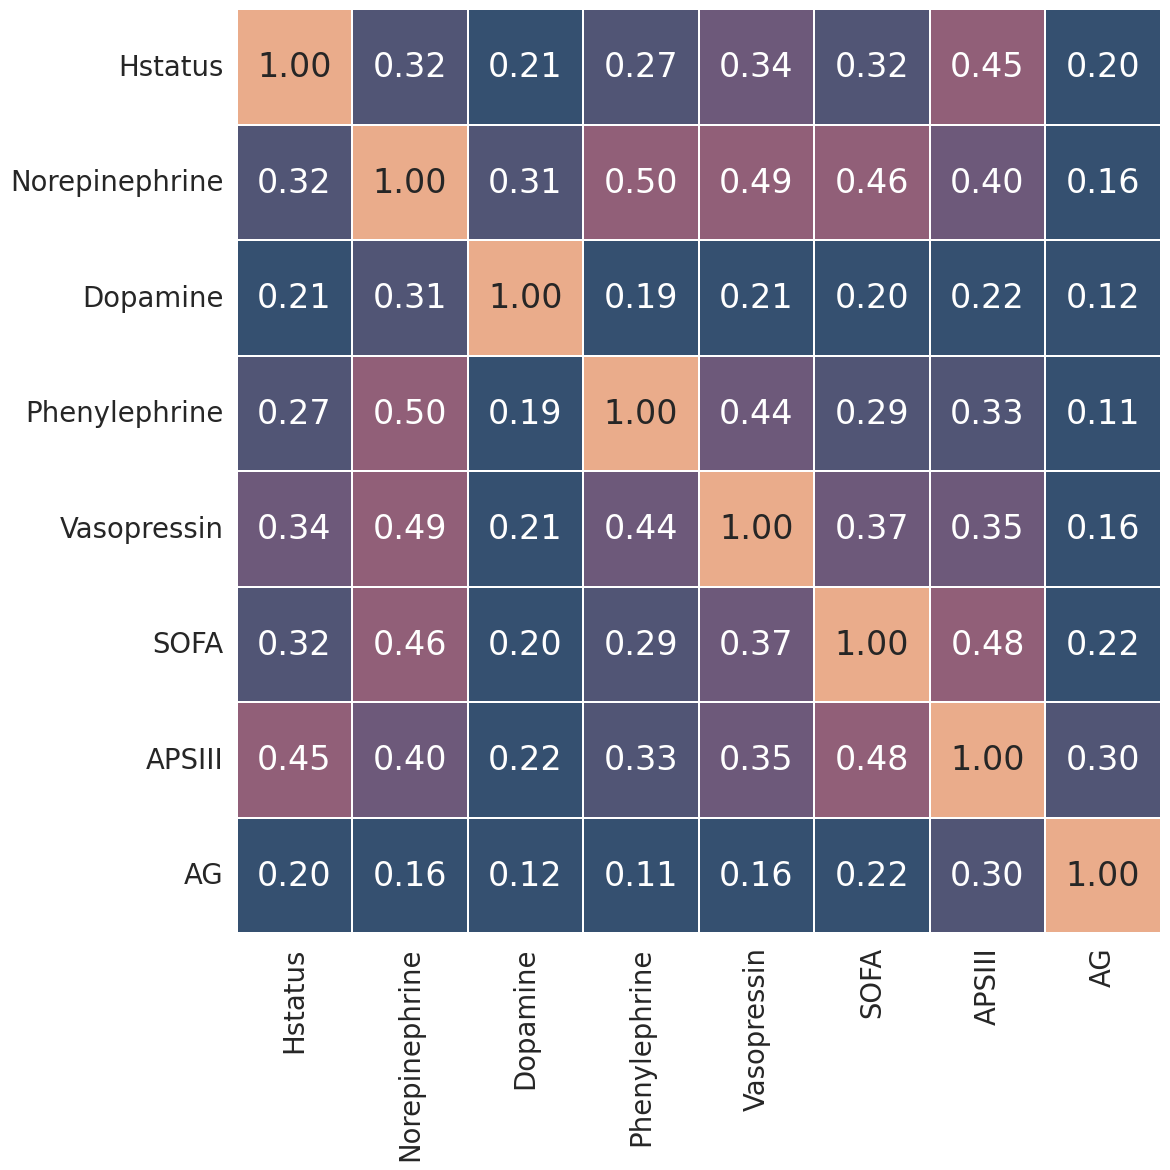

In [152]:
corr_mat = filtered_df.corr()


# Fig size
plt.figure(figsize = (12,12))

sns.set(font_scale = 1.8)
sns.set_style("whitegrid")

# #Change color palette
cmap = sns.color_palette(custom_palette, as_cmap = True)

annot_kws = {"fontsize": 24}

heatmap = sns.heatmap(corr_mat, annot=True, cmap = cmap ,cbar = False, square = True, linewidth = 0.2, fmt = ".2f", annot_kws=annot_kws)

plt.show

Get the columns that are 1 - 0 (before categorical, we assume) to filter them out from the box plots

In [201]:
one_zero_cols = df[corr_mat_cols].columns[(df[corr_mat_cols].eq(0) | df[corr_mat_cols].eq(1) | df[corr_mat_cols].isna()).all()]
filtered_df = df[corr_mat_cols].loc[:, ~df[corr_mat_cols].columns.isin(one_zero_cols)]
filtered_df.describe()

,SOFA,APSIII,AG
count,15983.000000,15983.000000,15983.000000
mean,3.443158,52.269912,15.274354
std,2.950538,21.954535,4.365253
min,0.000000,3.000000,5.000000
25%,1.000000,37.000000,12.000000
50%,3.000000,48.000000,15.000000
75%,5.000000,63.000000,17.000000
max,21.000000,173.000000,49.000000


In [204]:
filtered_df['Hstatus'] = df['Hstatus']
filtered_df.describe()

,SOFA,APSIII,AG,Hstatus
count,15983.000000,15983.000000,15983.000000,15983.000000
mean,3.443158,52.269912,15.274354,0.124382
std,2.950538,21.954535,4.365253,0.330027
min,0.000000,3.000000,5.000000,0.000000
25%,1.000000,37.000000,12.000000,0.000000
50%,3.000000,48.000000,15.000000,0.000000
75%,5.000000,63.000000,17.000000,0.000000
max,21.000000,173.000000,49.000000,1.000000


In [205]:
filtered_df.shape

(15983, 4)

With the features that where originaly numerical (assumed) create boxplots for outliers.

In [164]:
from sklearn.preprocessing import MinMaxScaler

In [206]:
scaler = MinMaxScaler()
filtered_df_scaled = scaler.fit_transform(filtered_df, y = None)

In [209]:
# cols1 = filtered_df.columns[1:8].tolist()
# cols2 = filtered_df.columns[9:17].tolist()
# cols3 = filtered_df.columns[18:].tolist()

df_scaled = pd.DataFrame(filtered_df_scaled, columns = filtered_df.columns)
# cols1.append('Hstatus')
# cols2.append('Hstatus')

In [178]:
# cols1

['Race',
 'Age',
 'SOFA',
 'APSIII',
 'Temperature',
 'RespiratoryRate',
 'HeartRate',
 'Hstatus']

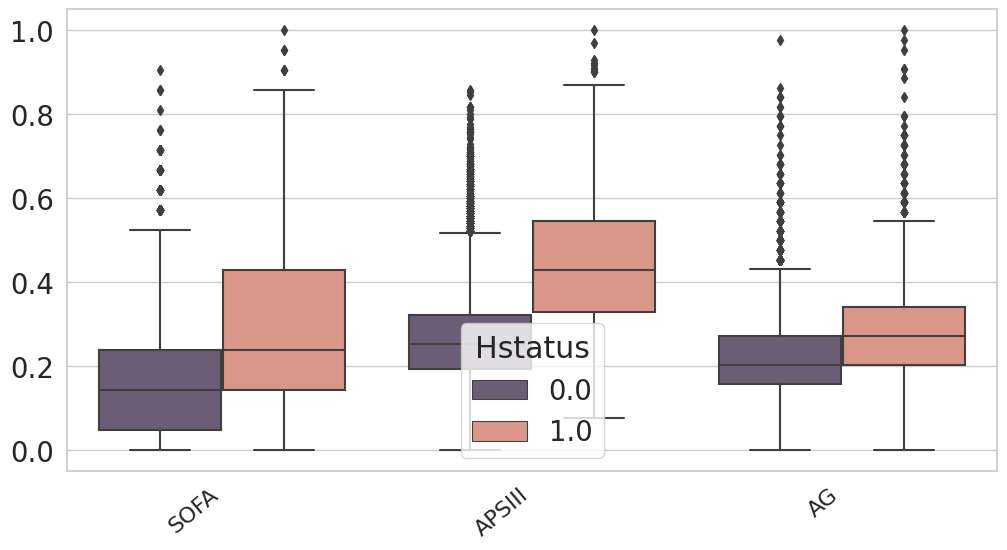

In [214]:
melted_df = pd.melt(df_scaled, id_vars = 'Hstatus', value_vars = df_scaled.columns , var_name = 'Feature')

plt.figure(figsize=(12, 6))

sns.set(font_scale = 1.8)
sns.set_style("whitegrid")

hstatus_color_mapping = {
    0: custom_palette[2],  # Color for Hstatus = 0
    1: custom_palette[6],  # Color for Hstatus = 1
}


# #Change color palette
sns.set_palette(hstatus_color_mapping.values())

annot_kws = {"fontsize": 24}

sns.boxplot(data = melted_df, x = 'Feature', y = 'value', hue = 'Hstatus')

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=16, rotation = 40, ha = 'right')
plt.show()

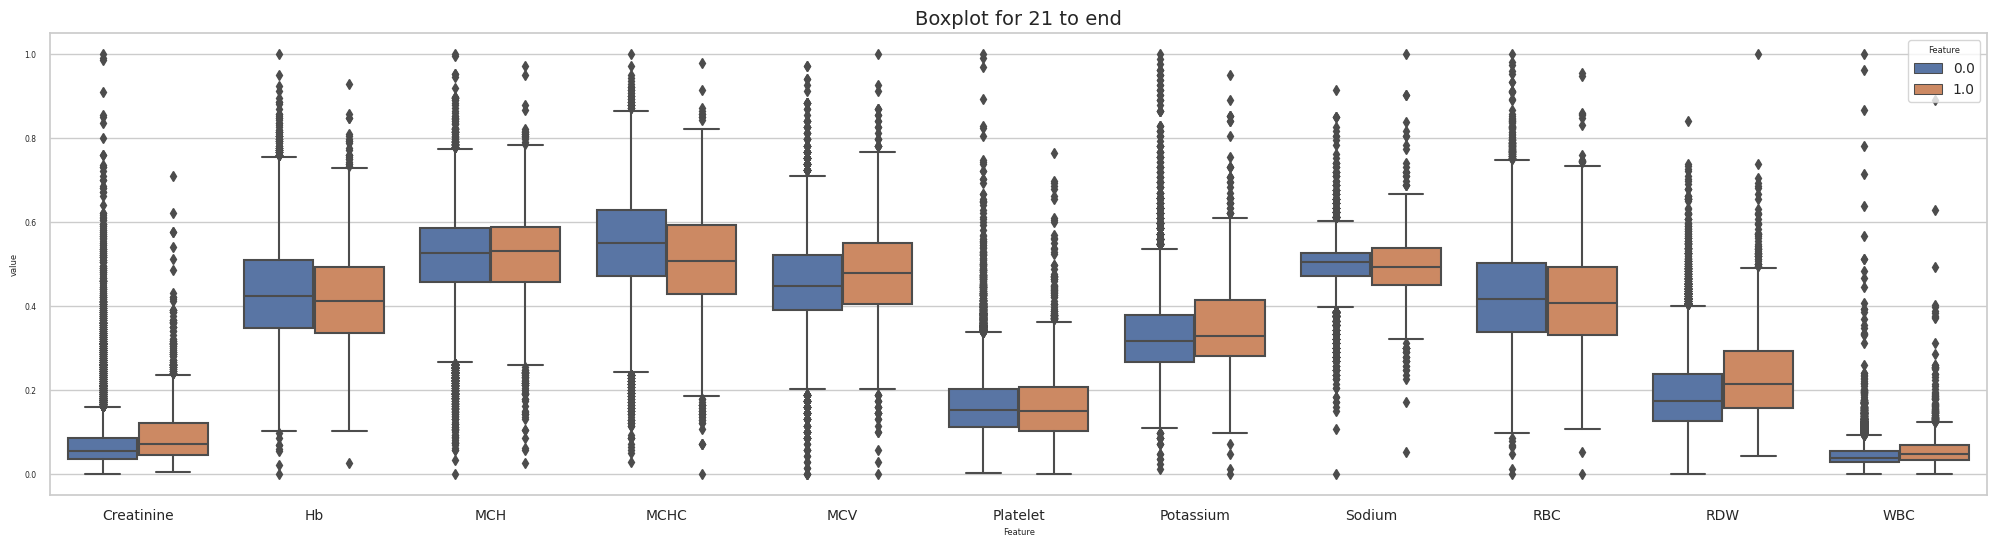

In [23]:
melted_df = pd.melt(df_scaled[cols2], id_vars = 'Hstatus', value_vars = cols2, var_name = 'Feature')

plt.figure(figsize=(25, 6))
sns.boxplot(data = melted_df, x = 'Feature', y = 'value', hue = 'Hstatus')

plt.title('Boxplot for 21 to end', fontsize=14)
plt.legend(title='Feature', fontsize=10)
plt.xticks(fontsize=10)

plt.show()

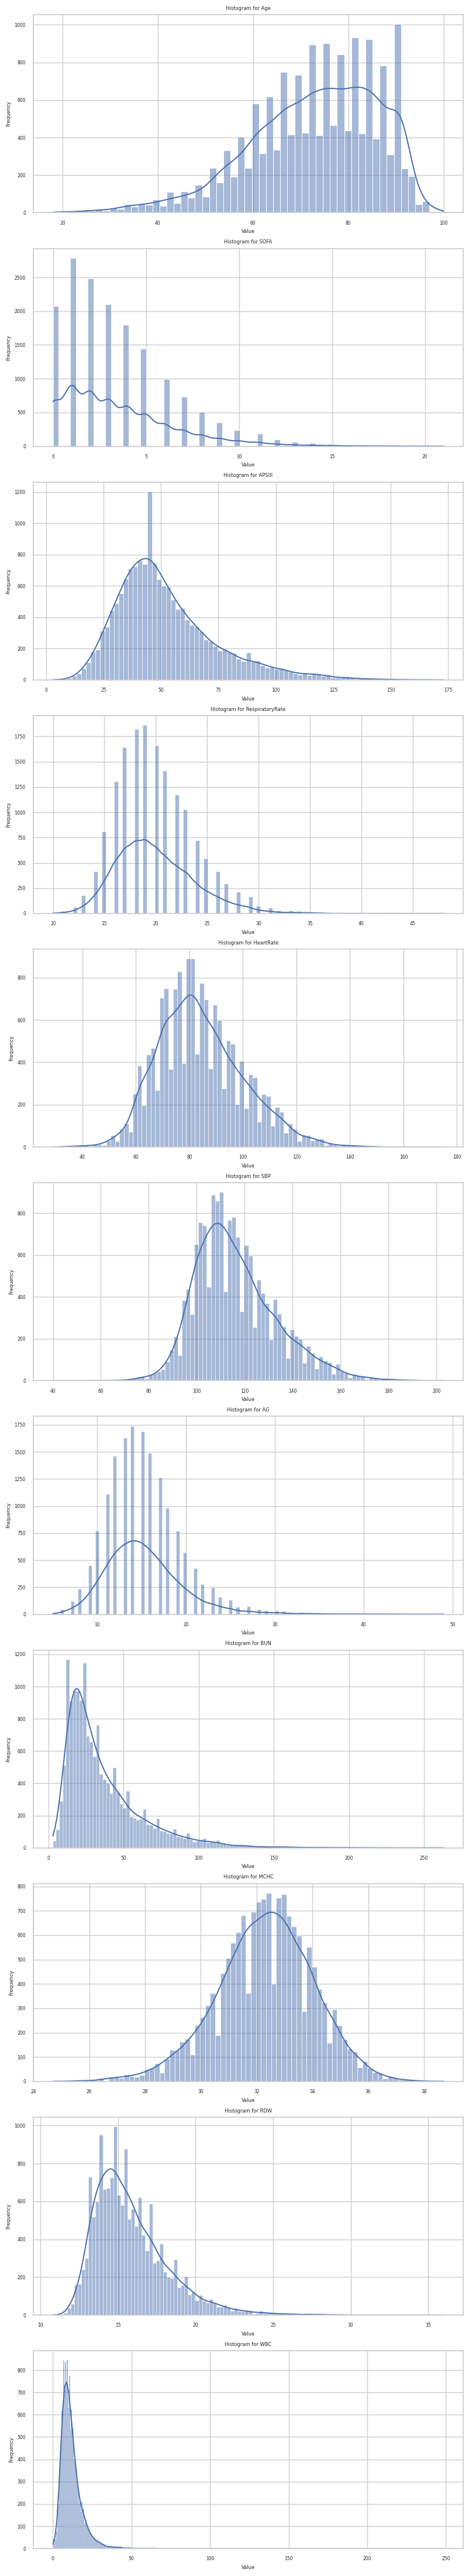

In [77]:
hist_cols = corr_mat_cols[7:]

fig, axes = plt.subplots(nrows=len(hist_cols), figsize=(8, 4 * len(hist_cols)))

for i, col in enumerate(hist_cols):
    sns.histplot(data=df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

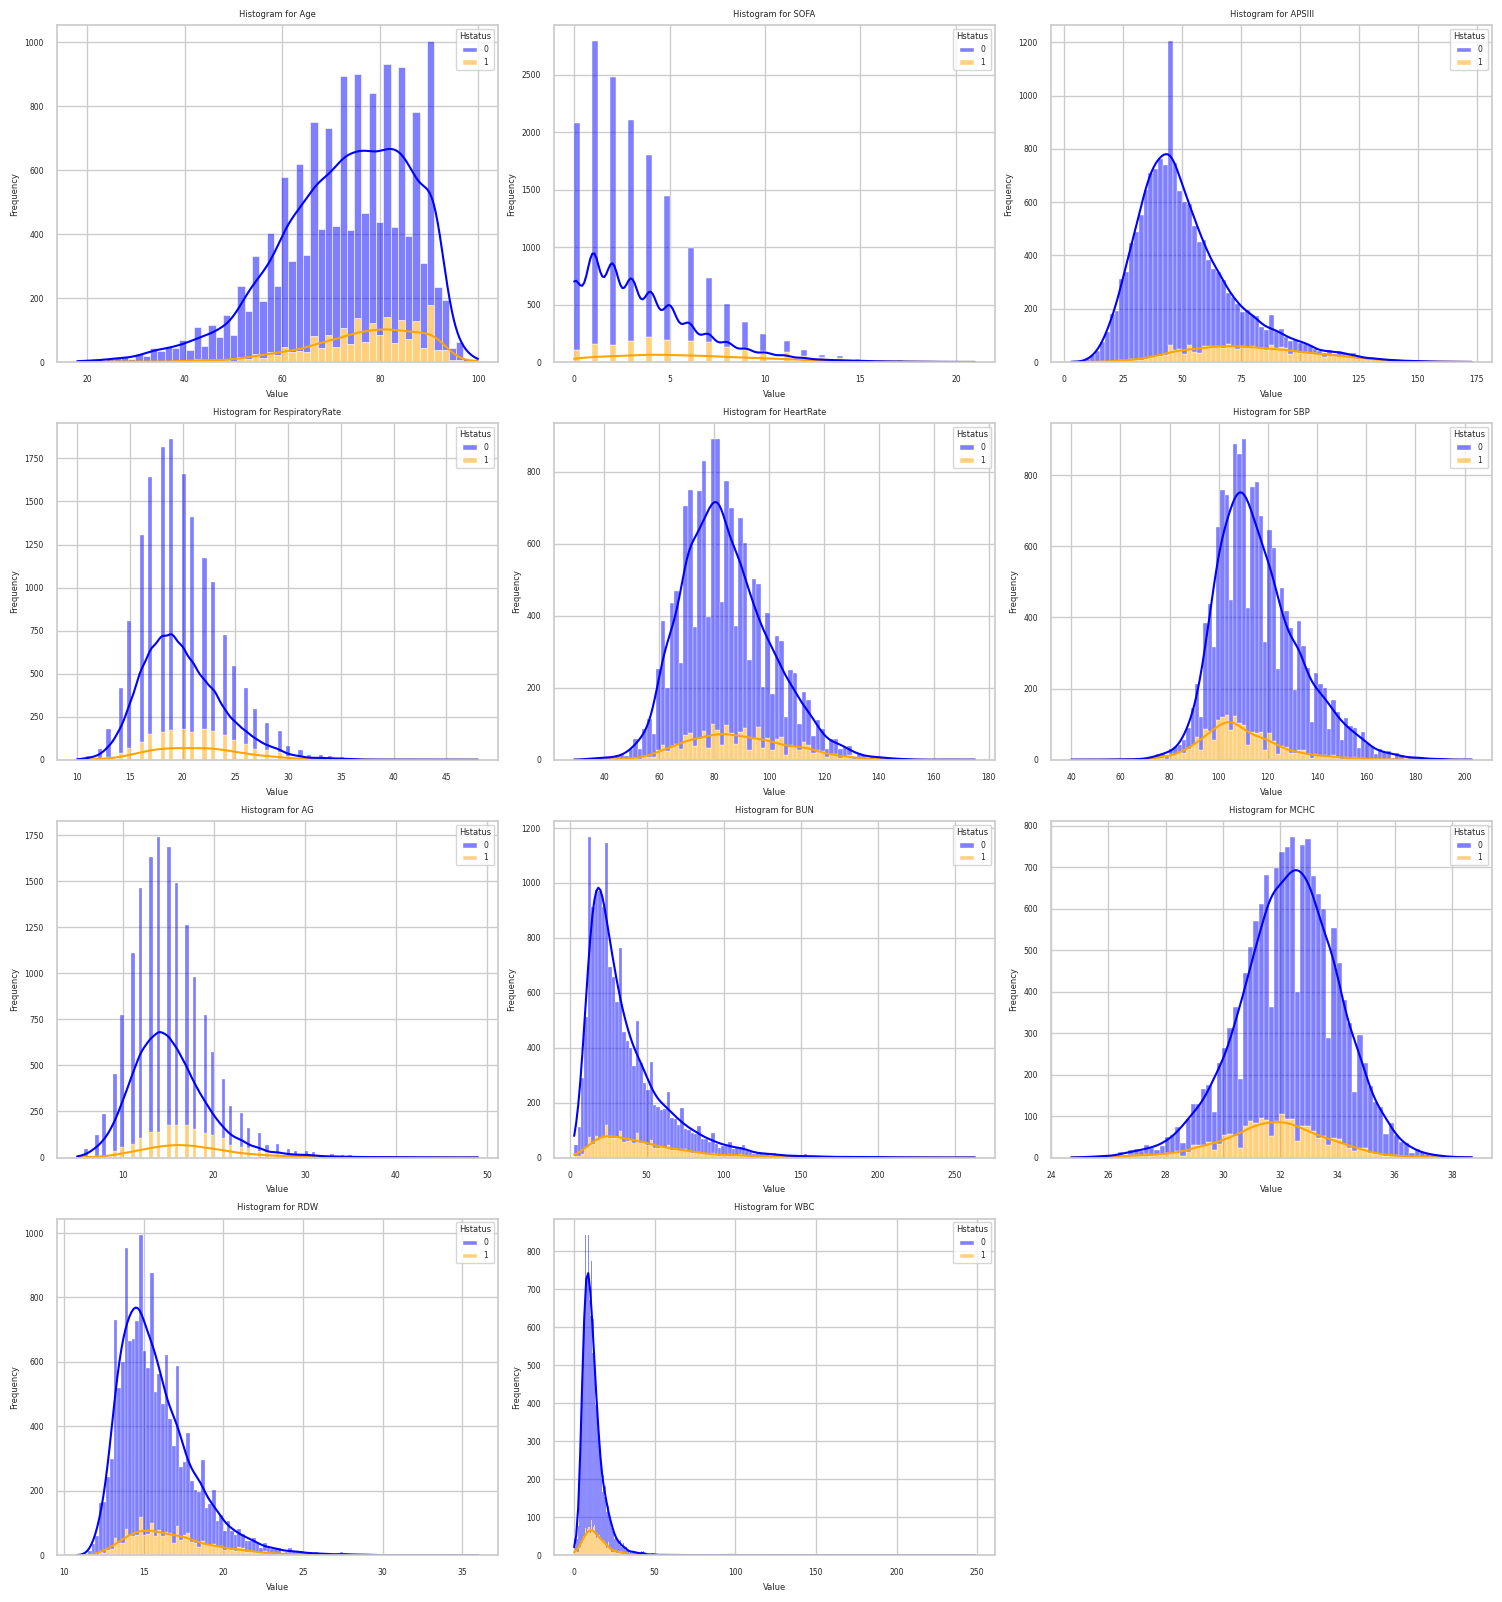

In [78]:

# Extract columns for histogram
hist_cols = corr_mat_cols[7:]

# Calculate the number of rows and columns for the grid
num_cols = 3
num_rows = int(np.ceil(len(hist_cols) / num_cols))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes array to easily iterate over it
axes_flat = axes.flatten()

# Plot histograms for each column and both outcomes on the same plot
for i, col in enumerate(hist_cols):
    sns.histplot(data=df, x=col, hue='Hstatus', kde=True, ax=axes_flat[i], multiple='stack', palette=['blue', 'orange'])
    axes_flat[i].set_title(f'Histogram for {col}')
    axes_flat[i].set_xlabel('Value')
    axes_flat[i].set_ylabel('Frequency')

# Hide empty subplots (if any)
for i in range(len(hist_cols), num_rows * num_cols):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()

Boxplots do not show enough difference one to one to analize the values

In [26]:
print(corr_mat_cols)

Index(['Hstatus', 'Norepinephrine', 'Dopamine', 'Epinephrine', 'Phenylephrine',
       'Vasopressin', 'Intubated', 'Age', 'SOFA', 'APSIII', 'RespiratoryRate',
       'HeartRate', 'SBP', 'AG', 'BUN', 'MCHC', 'RDW', 'WBC'],
      dtype='object')


Class Distribution

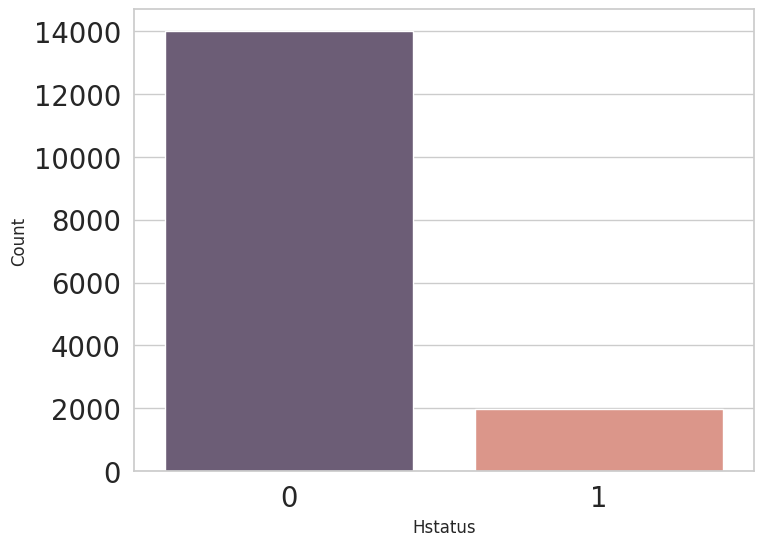

In [193]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hstatus', data=df)
plt.title('', fontsize=14)
plt.xlabel('Hstatus', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [213]:
target_proportions = df['Hstatus'].value_counts(normalize=True)
print(target_proportions)

0    0.875618
1    0.124382
Name: Hstatus, dtype: float64


## Data Preprocessing

In [80]:
# Fill with the median
df.fillna(df.median(), inplace=True) # There are too many outliers

### Resampling to compensate imbalance

## Feature Selection

In [29]:
y = df['Hstatus']
X = df.drop('Hstatus', axis = 1)

### Variance Threshold

In [84]:
from sklearn.feature_selection import VarianceThreshold

In [85]:
vt = VarianceThreshold(threshold = 0.25)
vt.fit(X)

# Create the dictionary to put the variances
pd.DataFrame({'Variance' : vt.variances_, 'select_feature' : vt.get_support()}, index = X.columns)

,Variance,select_feature
Group,0.000000,False
Gender,0.248480,False
Race,0.627249,True
Norepinephrine,0.239727,False
Dopamine,0.065679,False
Epinephrine,0.078201,False
Phenylephrine,0.132138,False
Vasopressin,0.144081,False
Vent,0.090483,False
Intubated,0.235607,False


In [86]:
vt.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [87]:
selected_cols = X.columns[vt.get_support()]
selected_cols

Index(['Race', 'Age', 'SOFA', 'APSIII', 'Temperature', 'RespiratoryRate',
       'HeartRate', 'SBP', 'AG', 'BUN', 'Calcium', 'Chloride', 'Creatinine',
       'Hb', 'MCH', 'MCHC', 'MCV', 'Platelet', 'Potassium', 'Sodium', 'RBC',
       'RDW', 'WBC'],
      dtype='object')

In [88]:
X_vt = X.iloc[:, vt.get_support()]
X_vt.head()
X_vt.shape

(3976, 23)

### Recursive Feature Elimination

In [89]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [90]:
rfe = RFE(estimator = LogisticRegression(max_iter = 5000), n_features_to_select=20, step = 1)


In [91]:
rfe_result = rfe.fit(X, y)
print(rfe_result.support_)
print(rfe_result.ranking_)

[False False False  True  True  True  True  True  True  True False  True
  True  True  True False  True False  True  True False False  True False
 False False  True False  True  True False False  True False False  True
 False]
[16  4  3  1  1  1  1  1  1  1  7  1  1  1  1  5  1  2  1  1 18 15  1 14
  9  8  1  6  1  1 11 17  1 10 13  1 12]


In [92]:
X_rfelogit = X.loc[:, rfe.get_support()]
X_rfelogit.columns

Index(['Norepinephrine', 'Dopamine', 'Epinephrine', 'Phenylephrine',
       'Vasopressin', 'Vent', 'Intubated', 'AMI', 'MC', 'Diabetes', 'HepF',
       'SOFA', 'Temperature', 'RespiratoryRate', 'AG', 'Creatinine', 'MCH',
       'MCHC', 'Potassium', 'RDW'],
      dtype='object')

### RFE with Cross Validation

In [93]:
rfecv_logit = RFECV(estimator = LogisticRegression(max_iter=5000),step = 1, cv=StratifiedKFold(5), scoring='accuracy' )

In [94]:
rfecv_logit.fit(X,y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(max_iter=5000), scoring='accuracy')

Plotting the performance vs number of features

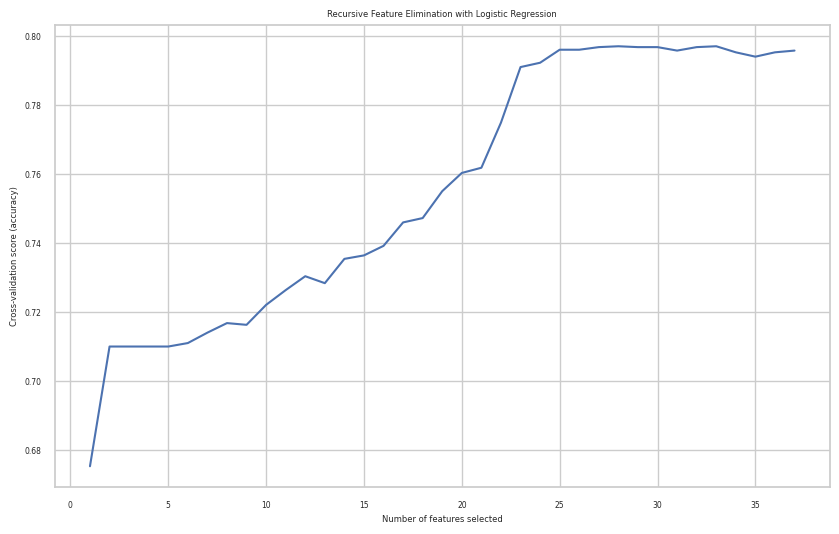

In [95]:
plt.figure(figsize=(10, 6))
plt.title('Recursive Feature Elimination with Logistic Regression')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv_logit.cv_results_['mean_test_score']) + 1), rfecv_logit.cv_results_['mean_test_score'])
plt.show()


In [96]:
optimal_num_features = rfecv_logit.n_features_
print("Optimal number of features:", optimal_num_features)

Optimal number of features: 33


In [97]:
X_rfecvlogit = X.loc[:, rfecv_logit.support_]
X_rfecvlogit.columns

Index(['Gender', 'Race', 'Norepinephrine', 'Dopamine', 'Epinephrine',
       'Phenylephrine', 'Vasopressin', 'Vent', 'Intubated', 'COPD', 'AMI',
       'MC', 'Diabetes', 'HepF', 'Age', 'SOFA', 'APSIII', 'Temperature',
       'RespiratoryRate', 'AG', 'BUN', 'Calcium', 'Chloride', 'Creatinine',
       'Hb', 'MCH', 'MCHC', 'MCV', 'Potassium', 'Sodium', 'RBC', 'RDW', 'WBC'],
      dtype='object')

**RFEcv -> RandomForrestClassifier**

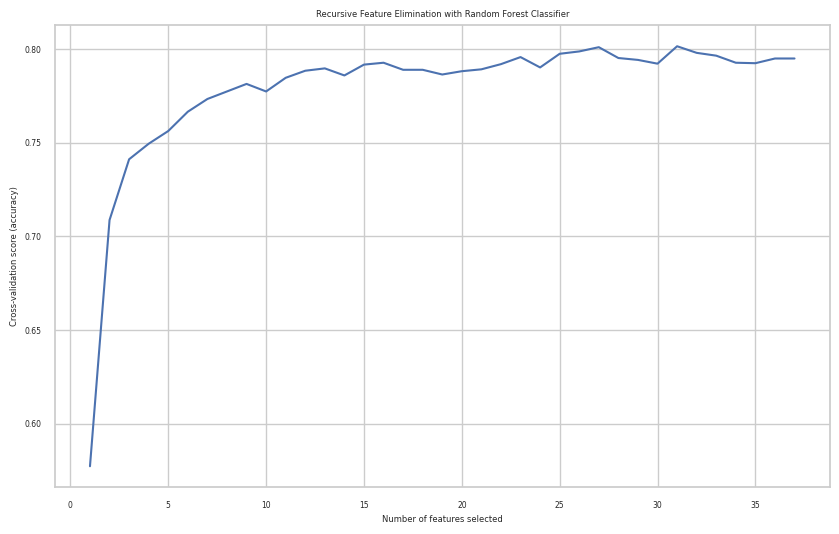

Optimal number of features: 31


In [98]:
rfecv_rf = RFECV(estimator=RandomForestClassifier(), step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv_rf.fit(X, y)

plt.figure(figsize=(10, 6))
plt.title('Recursive Feature Elimination with Random Forest Classifier')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv_rf.cv_results_['mean_test_score']) + 1), rfecv_rf.cv_results_['mean_test_score'])
plt.show()

optimal_num_features = rfecv_rf.n_features_
print("Optimal number of features:", optimal_num_features)

In [99]:
X_rfecvrf = X.loc[:, rfecv_rf.support_]
X_rfecvrf.columns

Index(['Race', 'Norepinephrine', 'Dopamine', 'Phenylephrine', 'Vasopressin',
       'Intubated', 'COPD', 'AMI', 'MC', 'Age', 'SOFA', 'APSIII',
       'Temperature', 'RespiratoryRate', 'HeartRate', 'SBP', 'AG', 'BUN',
       'Calcium', 'Chloride', 'Creatinine', 'Hb', 'MCH', 'MCHC', 'MCV',
       'Platelet', 'Potassium', 'Sodium', 'RBC', 'RDW', 'WBC'],
      dtype='object')

**RFEcs Tree**

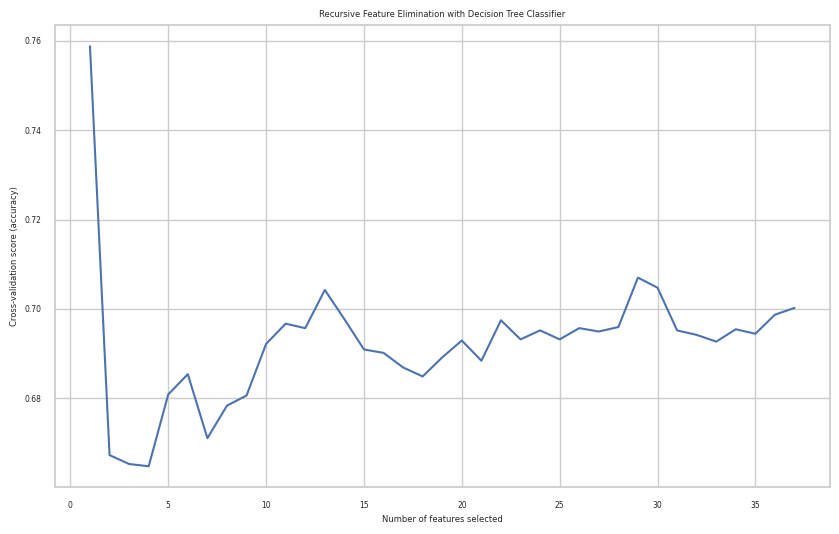

Optimal number of features: 1


In [100]:
rfecv_tree = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv_tree.fit(X, y)

plt.figure(figsize=(10, 6))
plt.title('Recursive Feature Elimination with Decision Tree Classifier')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv_tree.cv_results_['mean_test_score']) + 1), rfecv_tree.cv_results_['mean_test_score'])
plt.show()

optimal_num_features = rfecv_tree.n_features_
print("Optimal number of features:", optimal_num_features)

In [101]:
X_rfecvtree = X.loc[:, rfecv_tree.support_]
X_rfecvtree.columns

Index(['APSIII'], dtype='object')

### Performance Evaluation with different features

**Testing with Logistic Regression**

In [102]:
# Put all the results of the estimators in one dictionary

feature_selection_models = {
    'rfe_logit' : rfe,
    'var_thresh' : vt,
    'rfecv_tree': rfecv_tree,
    'rfecv_logit': rfecv_logit,
    'rfecv_rf': rfecv_rf
}

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Performance for rfe_logit:
Accuracy: 0.7374371859296482
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.77      0.76       421
           1       0.73      0.70      0.72       375

    accuracy                           0.74       796
   macro avg       0.74      0.74      0.74       796
weighted avg       0.74      0.74      0.74       796

Confusion Matrix: [[323  98]
 [111 264]]
ROC AUC: 0.8038131433095804


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


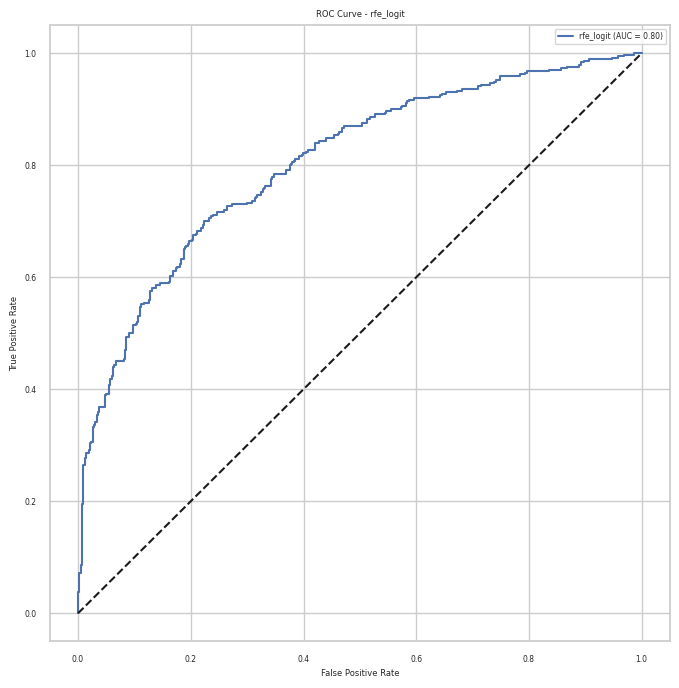



Performance for var_thresh:
Accuracy: 0.757537688442211
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.76      0.77       421
           1       0.74      0.75      0.74       375

    accuracy                           0.76       796
   macro avg       0.76      0.76      0.76       796
weighted avg       0.76      0.76      0.76       796

Confusion Matrix: [[322  99]
 [ 94 281]]
ROC AUC: 0.8409817893903404


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


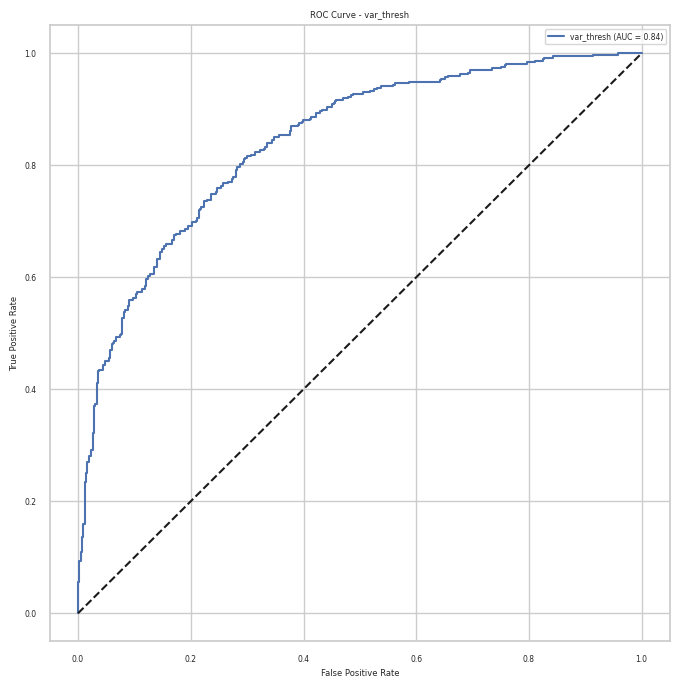



Performance for rfecv_tree:
Accuracy: 0.7537688442211056
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.79      0.77       421
           1       0.75      0.72      0.73       375

    accuracy                           0.75       796
   macro avg       0.75      0.75      0.75       796
weighted avg       0.75      0.75      0.75       796

Confusion Matrix: [[331  90]
 [106 269]]
ROC AUC: 0.8119113222486144


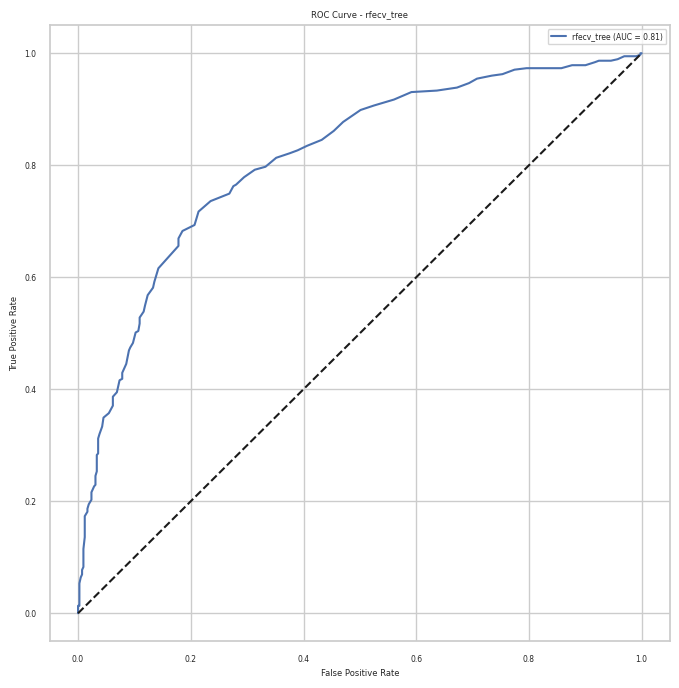



Performance for rfecv_logit:
Accuracy: 0.7688442211055276
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.78      0.78       421
           1       0.75      0.75      0.75       375

    accuracy                           0.77       796
   macro avg       0.77      0.77      0.77       796
weighted avg       0.77      0.77      0.77       796

Confusion Matrix: [[329  92]
 [ 92 283]]
ROC AUC: 0.8495771971496437


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


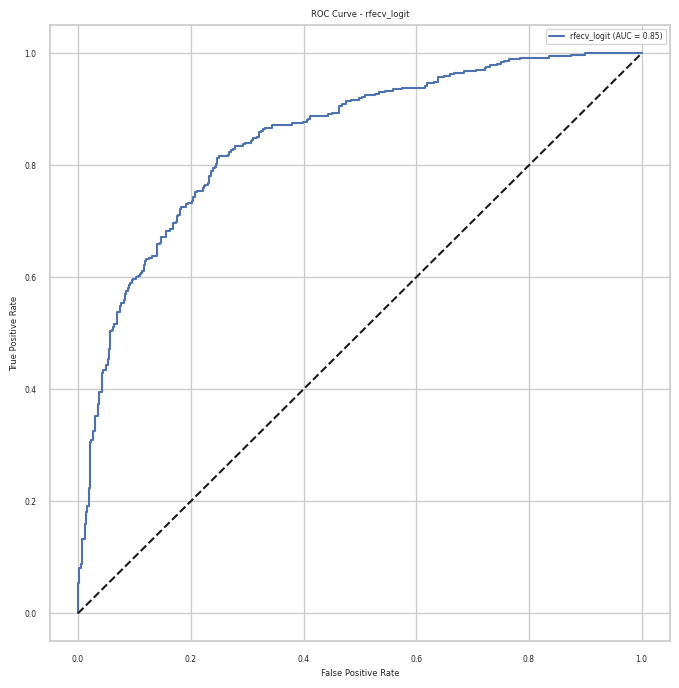



Performance for rfecv_rf:
Accuracy: 0.7550251256281407
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.76      0.77       421
           1       0.73      0.75      0.74       375

    accuracy                           0.76       796
   macro avg       0.75      0.75      0.75       796
weighted avg       0.76      0.76      0.76       796

Confusion Matrix: [[319 102]
 [ 93 282]]
ROC AUC: 0.843065716547902


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


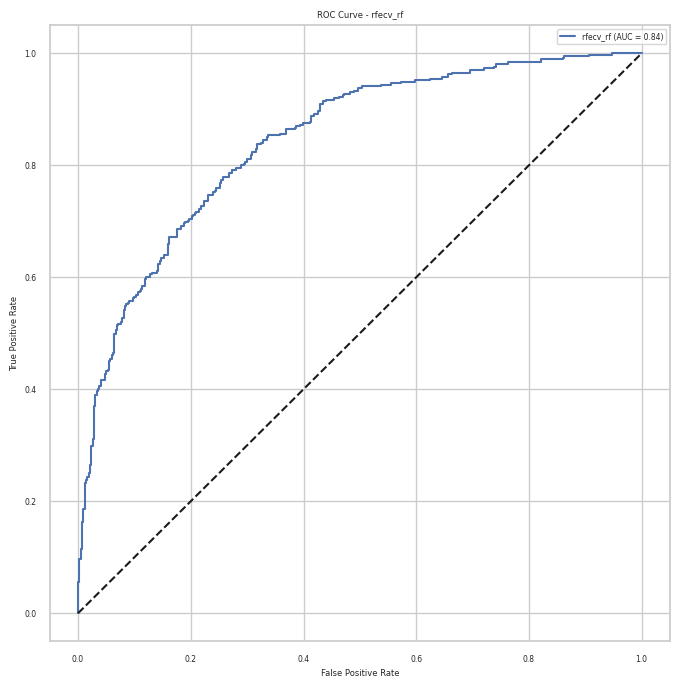

In [104]:
for model_name, model in feature_selection_models.items():

    X_model = X_train.loc[:, model.get_support()]

    logreg = LogisticRegression()
    logreg.fit(X_model, y_train)

    y_pred = logreg.predict(X_test.loc[:, model.get_support()])



    y_pred_prob = logreg.predict_proba(X_test.loc[:, model.get_support()])[:, 1]


    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Print metrics
    print(f"Performance for {model_name}:")
    print("Accuracy:", accuracy)
    print("Classification Report:", class_report)
    print("Confusion Matrix:", conf_mat)
    print("ROC AUC:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    print("\n")

 ## Scaling

 Use all the scalers here to find the best later

In [105]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, QuantileTransformer, StandardScaler


In [106]:
scaler = MinMaxScaler()

In [107]:
X_scaled = scaler.fit_transform(X.loc[:, rfecv_tree.support_]) # With my best model

## Model Implementation and Evaluation

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y , random_state=42)


### Decision Tree

In [109]:
#Basic Tree

basic_tree = DecisionTreeClassifier(random_state = 0)
basic_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [110]:
print("Train Accuracy:", basic_tree.score(X_train, y_train))
print("Test Accuracy:", basic_tree.score(X_test, y_test))

Train Accuracy: 0.7645875251509054
Test Accuracy: 0.7736418511066399


In [111]:
from sklearn.tree import export_graphviz
X_df = pd.DataFrame(X_scaled, columns = X.loc[:, rfecv_tree.support_].columns)
export_graphviz(basic_tree, out_file="basic_tree.dot",
                class_names=["alive", "dead"],
                feature_names= X_df.columns,
                impurity=False,
                filled=True, rounded=True)

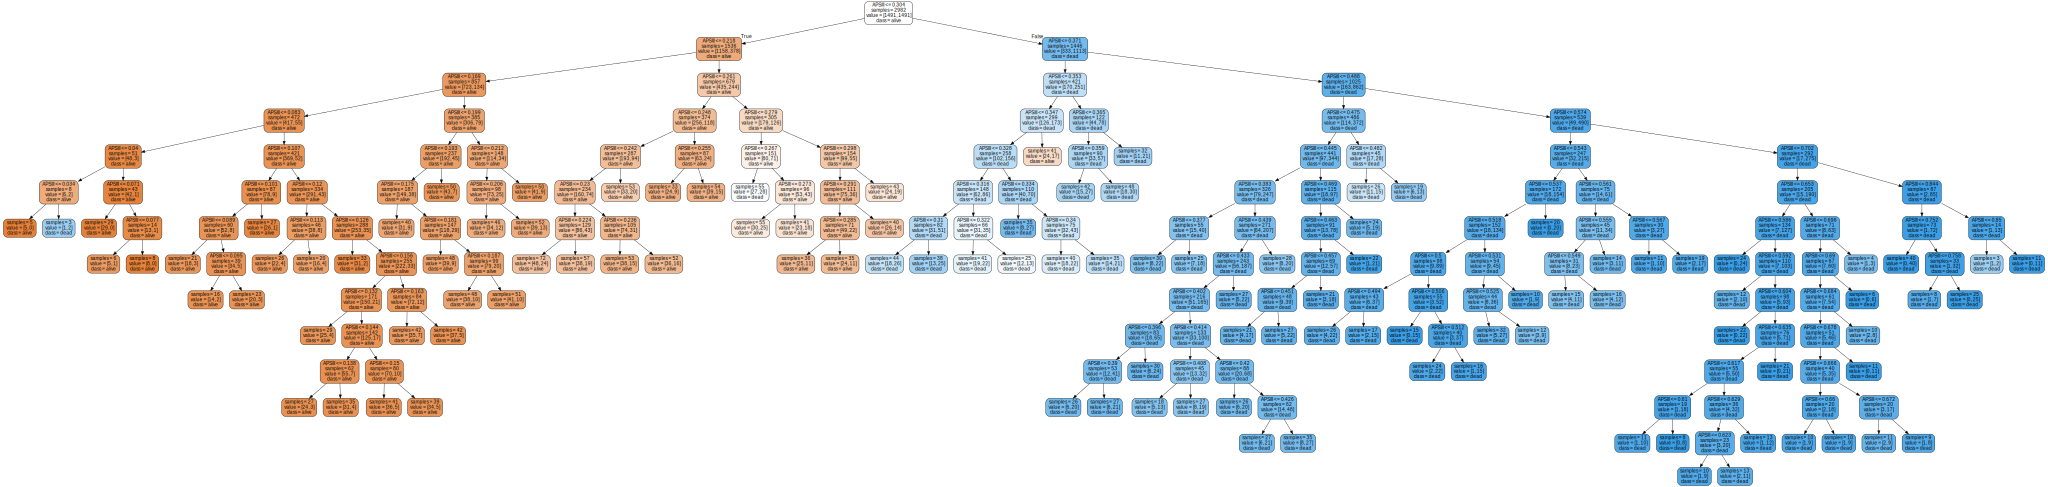

In [112]:
import graphviz
tree_plot = graphviz.Source.from_file("basic_tree.dot")
tree_plot

**Tuned Tree**

In [113]:
from sklearn.metrics import auc


In [114]:
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier(random_state=42)


param_grid = {
    'criterion': ['entropy'],
    'splitter': ['random'],
    'max_depth': [15],
    'min_samples_split': [15],
    'min_samples_leaf': [1],
    'min_weight_fraction_leaf': [0.0],
    'max_features': [None],
    'max_leaf_nodes': [15],
    'min_impurity_decrease': [0.0],
    'ccp_alpha': [0.0]
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)


best_dt_model = grid_search.best_estimator_


Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}




```

Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}


```

Test results

```
Test Accuracy with Best Model: 0.864406779661017
Confusion Matrix:
[[253   2]
 [ 38   2]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       255
         1.0       0.50      0.05      0.09        40

    accuracy                           0.86       295
   macro avg       0.68      0.52      0.51       295
weighted avg       0.82      0.86      0.81       295

```

Training Results

```
Training Accuracy with Best Model: 0.8786848072562359
Confusion Matrix for Training Set:
[[761   2]
 [105  14]]
Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       763
         1.0       0.88      0.12      0.21       119

    accuracy                           0.88       882
   macro avg       0.88      0.56      0.57       882
weighted avg       0.88      0.88      0.84       882
```


In [115]:
y_pred = best_dt_model.predict(X_test)
test_accuracy = best_dt_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Test Accuracy with Best Model: 0.7746478873239436
Confusion Matrix:
[[385 112]
 [112 385]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       497
           1       0.77      0.77      0.77       497

    accuracy                           0.77       994
   macro avg       0.77      0.77      0.77       994
weighted avg       0.77      0.77      0.77       994



In [116]:
y_train_pred = best_dt_model.predict(X_train)
train_accuracy = best_dt_model.score(X_train, y_train)
print("Training Accuracy with Best Model:", train_accuracy)

# Confusion Matrix for Training Set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)

# Classification Report for Training Set
class_report_train = classification_report(y_train, y_train_pred)
print("Classification Report for Training Set:")
print(class_report_train)

Training Accuracy with Best Model: 0.7598926894701542
Confusion Matrix for Training Set:
[[1134  357]
 [ 359 1132]]
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1491
           1       0.76      0.76      0.76      1491

    accuracy                           0.76      2982
   macro avg       0.76      0.76      0.76      2982
weighted avg       0.76      0.76      0.76      2982



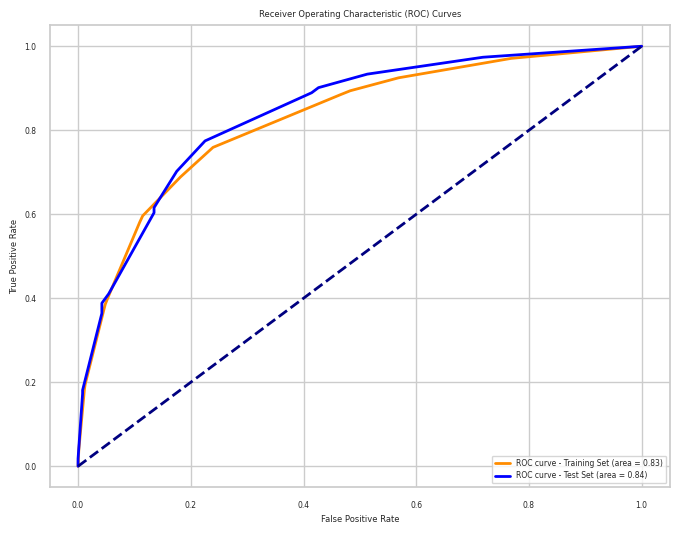

In [117]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_dt_model.predict_proba(X_train)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)


plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve - Training Set (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='ROC curve - Test Set (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

### Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

**Gaussian  no tuning vs with tuning**

In [119]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred_gnb = gnb_classifier.predict(X_test)

In [120]:
param_grid_gnb = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_gnb = GridSearchCV(gnb_classifier, param_grid_gnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gnb.fit(X_train, y_train)

best_gnb_model = grid_search_gnb.best_estimator_

print("Best Hyperparameters for Gaussian Naive Bayes (Tuned):", grid_search_gnb.best_params_)


Best Hyperparameters for Gaussian Naive Bayes (Tuned): {'var_smoothing': 1e-10}


This is to print the metrics side by side to compare the performance of the same algorithm without and with tuning

In [121]:
# Evaluate the model
test_accuracy_gnb = gnb_classifier.score(X_test, y_test)
print("Test Accuracy with Gaussian Naive Bayes (No Tuning):", test_accuracy_gnb)

# Confusion Matrix for Test Set
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix for Gaussian Naive Bayes (No Tuning):")
print(conf_matrix_gnb)

# Classification Report for Test Set
class_report_gnb = classification_report(y_test, y_pred_gnb)
print("Classification Report for Gaussian Naive Bayes (No Tuning):")
print(class_report_gnb)


# NOW FOR TUNING

test_accuracy_best_gnb = best_gnb_model.score(X_test, y_test)
print("Test Accuracy with Best Gaussian Naive Bayes Model (Tuned):", test_accuracy_best_gnb)

# Confusion Matrix for Test Set
y_pred_best_gnb = best_gnb_model.predict(X_test)
conf_matrix_best_gnb = confusion_matrix(y_test, y_pred_best_gnb)
print("Confusion Matrix for Best Gaussian Naive Bayes Model (Tuned):")
print(conf_matrix_best_gnb)

# Classification Report for Test Set
class_report_best_gnb = classification_report(y_test, y_pred_best_gnb)
print("Classification Report for Best Gaussian Naive Bayes Model (Tuned):")
print(class_report_best_gnb)

Test Accuracy with Gaussian Naive Bayes (No Tuning): 0.7464788732394366
Confusion Matrix for Gaussian Naive Bayes (No Tuning):
[[422  75]
 [177 320]]
Classification Report for Gaussian Naive Bayes (No Tuning):
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       497
           1       0.81      0.64      0.72       497

    accuracy                           0.75       994
   macro avg       0.76      0.75      0.74       994
weighted avg       0.76      0.75      0.74       994

Test Accuracy with Best Gaussian Naive Bayes Model (Tuned): 0.7464788732394366
Confusion Matrix for Best Gaussian Naive Bayes Model (Tuned):
[[422  75]
 [177 320]]
Classification Report for Best Gaussian Naive Bayes Model (Tuned):
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       497
           1       0.81      0.64      0.72       497

    accuracy                           0.75       994
   macro avg  

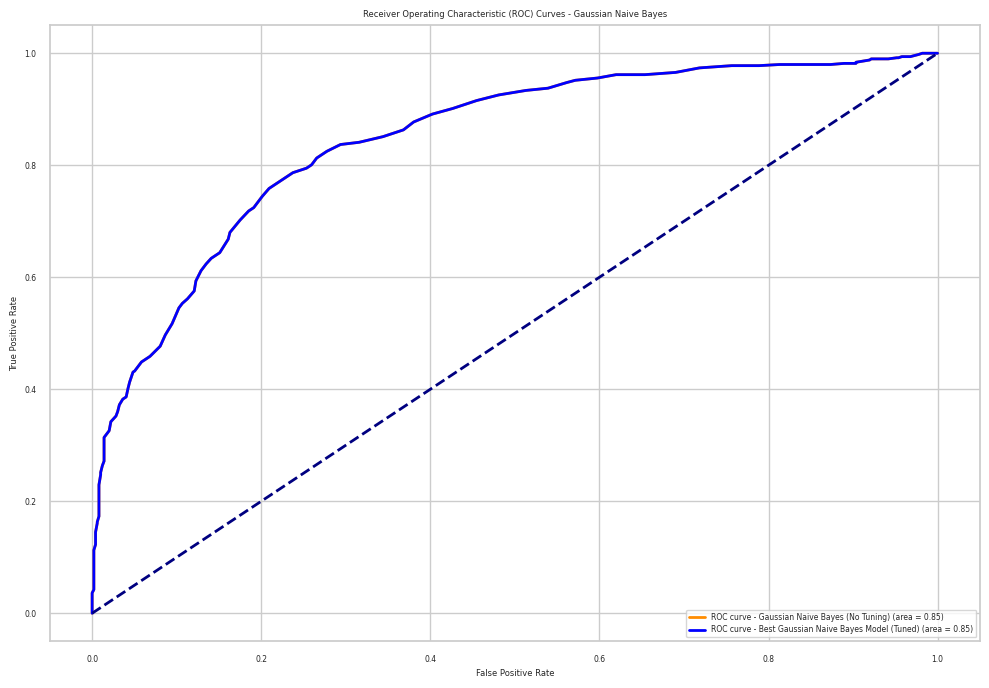

In [122]:
# ROC Curve for Gaussian Naive Bayes (No Tuning)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_classifier.predict_proba(X_test)[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# ROC Curve for Best Gaussian Naive Bayes Model (Tuned)
fpr_best_gnb, tpr_best_gnb, thresholds_best_gnb = roc_curve(y_test, best_gnb_model.predict_proba(X_test)[:, 1])
roc_auc_best_gnb = auc(fpr_best_gnb, tpr_best_gnb)

# Plot ROC Curves for both models
plt.figure(figsize=(12, 8))

# Plot ROC curve for Gaussian Naive Bayes (No Tuning)
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label='ROC curve - Gaussian Naive Bayes (No Tuning) (area = {:.2f})'.format(roc_auc_gnb))

# Plot ROC curve for Best Gaussian Naive Bayes Model (Tuned)
plt.plot(fpr_best_gnb, tpr_best_gnb, color='blue', lw=2, label='ROC curve - Best Gaussian Naive Bayes Model (Tuned) (area = {:.2f})'.format(roc_auc_best_gnb))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves - Gaussian Naive Bayes')
plt.legend(loc='lower right')

# Display the plot
plt.show()

**Miltinomial Nave Bayes with and without tuning**

In [123]:
# Instantiate Multinomial Naive Bayes model (No Tuning)
mnb_classifier_no_tuning = MultinomialNB()

# Train Multinomial Naive Bayes model (No Tuning)
mnb_classifier_no_tuning.fit(X_train, y_train)

# Predictions on the test set (No Tuning)
y_pred_mnb_no_tuning = mnb_classifier_no_tuning.predict(X_test)


# Hyperparameter Tuning for Multinomial Naive Bayes
# Instantiate Multinomial Naive Bayes model (Tuned)
mnb_classifier_tuned = MultinomialNB()

# Define the parameter grid for hyperparameter tuning
param_grid_mnb = {
    'alpha': [1e-10, 1e-5, 1e-3, 0.1, 1.0]
}

# Perform GridSearchCV
grid_search_mnb = GridSearchCV(mnb_classifier_tuned, param_grid_mnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_mnb.fit(X_train, y_train)

# Get the best model
best_mnb_model = grid_search_mnb.best_estimator_


print("Best Hyperparameters for Multinomial Naive Bayes (Tuned):", grid_search_mnb.best_params_)



Best Hyperparameters for Multinomial Naive Bayes (Tuned): {'alpha': 1e-10}


In [124]:
# Evaluate the model (No Tuning)
test_accuracy_mnb_no_tuning = mnb_classifier_no_tuning.score(X_test, y_test)
print("Test Accuracy with Multinomial Naive Bayes (No Tuning):", test_accuracy_mnb_no_tuning)

# Confusion Matrix for Test Set (No Tuning)
conf_matrix_mnb_no_tuning = confusion_matrix(y_test, y_pred_mnb_no_tuning)
print("Confusion Matrix for Multinomial Naive Bayes (No Tuning):")
print(conf_matrix_mnb_no_tuning)

# Classification Report for Test Set (No Tuning)
class_report_mnb_no_tuning = classification_report(y_test, y_pred_mnb_no_tuning)
print("Classification Report for Multinomial Naive Bayes (No Tuning):")
print(class_report_mnb_no_tuning)

test_accuracy_best_mnb = best_mnb_model.score(X_test, y_test)
print("Test Accuracy with Best Multinomial Naive Bayes Model (Tuned):", test_accuracy_best_mnb)

# Confusion Matrix for Test Set (Tuned)
y_pred_best_mnb = best_mnb_model.predict(X_test)
conf_matrix_best_mnb = confusion_matrix(y_test, y_pred_best_mnb)
print("Confusion Matrix for Best Multinomial Naive Bayes Model (Tuned):")
print(conf_matrix_best_mnb)

# Classification Report for Test Set (Tuned)
class_report_best_mnb = classification_report(y_test, y_pred_best_mnb)
print("Classification Report for Best Multinomial Naive Bayes Model (Tuned):")
print(class_report_best_mnb)




Test Accuracy with Multinomial Naive Bayes (No Tuning): 0.5
Confusion Matrix for Multinomial Naive Bayes (No Tuning):
[[497   0]
 [497   0]]
Classification Report for Multinomial Naive Bayes (No Tuning):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       497
           1       0.00      0.00      0.00       497

    accuracy                           0.50       994
   macro avg       0.25      0.50      0.33       994
weighted avg       0.25      0.50      0.33       994

Test Accuracy with Best Multinomial Naive Bayes Model (Tuned): 0.5
Confusion Matrix for Best Multinomial Naive Bayes Model (Tuned):
[[497   0]
 [497   0]]
Classification Report for Best Multinomial Naive Bayes Model (Tuned):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       497
           1       0.00      0.00      0.00       497

    accuracy                           0.50       994
   macro avg       0.25   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

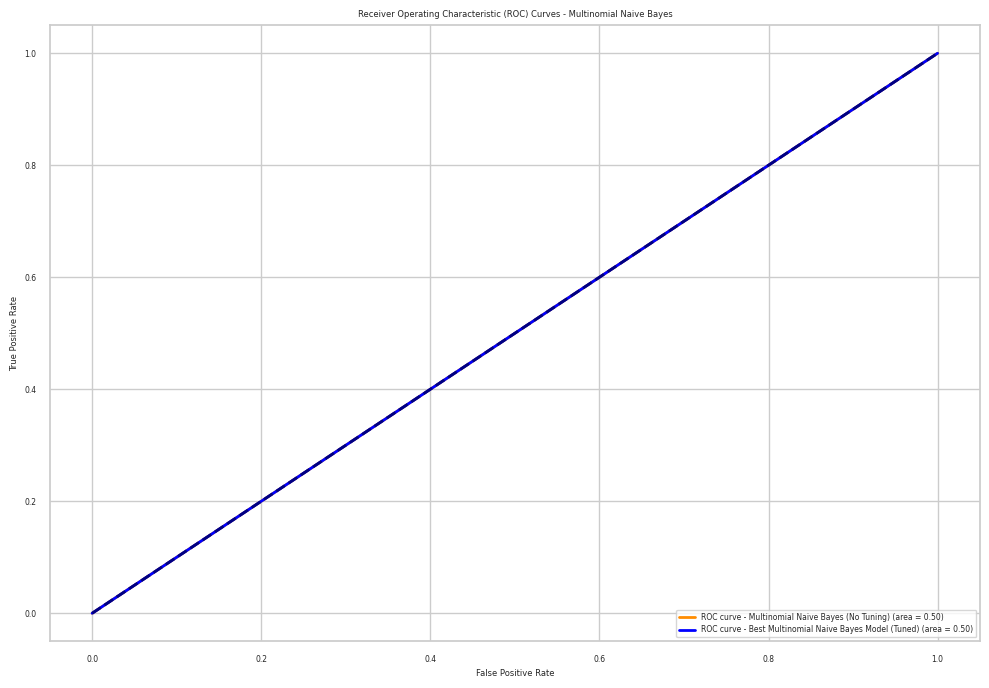

In [125]:
# ROC Curve for Multinomial Naive Bayes (No Tuning)
fpr_mnb_no_tuning, tpr_mnb_no_tuning, thresholds_mnb_no_tuning = roc_curve(
    y_test, mnb_classifier_no_tuning.predict_proba(X_test)[:, 1]
)
roc_auc_mnb_no_tuning = auc(fpr_mnb_no_tuning, tpr_mnb_no_tuning)

# ROC Curve for Best Multinomial Naive Bayes Model (Tuned)
fpr_best_mnb, tpr_best_mnb, thresholds_best_mnb = roc_curve(
    y_test, best_mnb_model.predict_proba(X_test)[:, 1]
)
roc_auc_best_mnb = auc(fpr_best_mnb, tpr_best_mnb)

# Plot ROC Curves for both models
plt.figure(figsize=(12, 8))
plt.plot(
    fpr_mnb_no_tuning, tpr_mnb_no_tuning,
    color='darkorange', lw=2, label='ROC curve - Multinomial Naive Bayes (No Tuning) (area = {:.2f})'.format(roc_auc_mnb_no_tuning)
)
plt.plot(
    fpr_best_mnb, tpr_best_mnb,
    color='blue', lw=2, label='ROC curve - Best Multinomial Naive Bayes Model (Tuned) (area = {:.2f})'.format(roc_auc_best_mnb)
)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves - Multinomial Naive Bayes')
plt.legend(loc='lower right')
plt.show()
